In [1]:
from datetime import datetime

import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler

from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import graphviz

np.random.seed(915)

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
dados = pd.read_csv(uri)

In [2]:
dados['sold'] = dados['sold'].map({'yes':1, 'no':0})
dados.rename(columns={'mileage_per_year':'km_anual', 'model_year':'idade' }, inplace=True)
dados.idade = datetime.now().year - dados.idade
dados.km_anual = 1.60934*dados.km_anual

dados.drop('Unnamed: 0', axis=1, inplace=True)

dados.head()

,km_anual,idade,price,sold
0,35085.22134,19,30941.02,1
1,12622.05362,21,40557.96,1
2,11440.79806,13,89627.50,0
3,43167.32682,4,95276.14,0
4,12770.11290,5,117384.68,1


In [3]:
x = dados[['km_anual', 'idade', 'price']]
y = dados['sold']

## Visualização dos dados

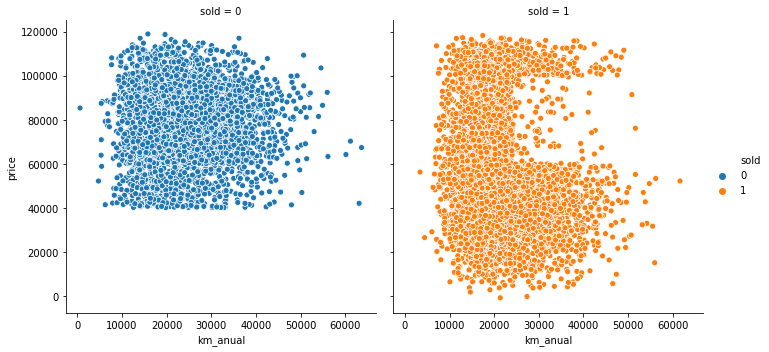

In [4]:
sns.relplot(x='km_anual', y='price', data=dados, hue='sold', col='sold')

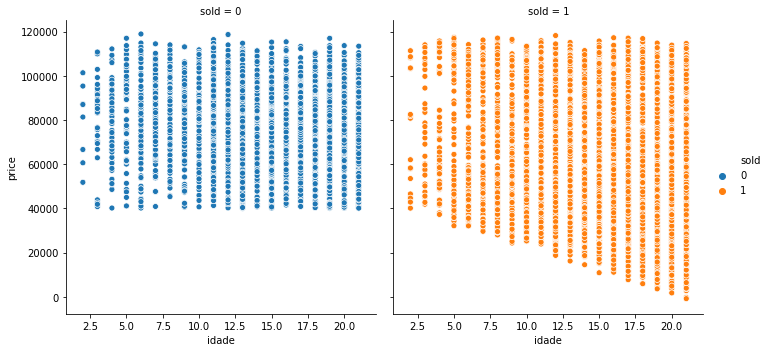

In [5]:
sns.relplot(x='idade', y='price', data=dados, hue='sold', col='sold')

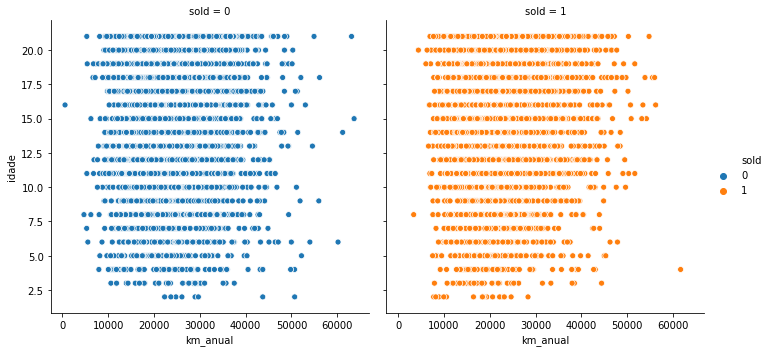

In [6]:
sns.relplot(y='idade', x='km_anual', data=dados, hue='sold', col='sold')

In [7]:
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=.25, stratify=y)

## Baseline

In [8]:
model = DummyClassifier(strategy='most_frequent')
model.fit(treino_x, treino_y)

previsoes = model.predict(teste_x)
score = accuracy_score(teste_y, previsoes)
print(f'A Acurácia foi {score:.2%} com o modelo {str(model)} treinado com {len(treino_x)} e testado com {len(teste_x)} casos')

A Acurácia foi 58.00% com o modelo DummyClassifier(constant=None, random_state=None, strategy='most_frequent') treinado com 7500 e testado com 2500 casos


## Normalização dos dados

In [9]:
scaler = StandardScaler()
scaler.fit(treino_x)
sc_treino_x = scaler.transform(treino_x)
sc_teste_x = scaler.transform(teste_x)

/home/arthur/Stuff/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/arthur/Stuff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/arthur/Stuff/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## SVC

In [10]:
model = SVC()
model.fit(sc_treino_x, treino_y)

score = model.score(sc_teste_x, teste_y)

print(f'A Acurácia foi {score:.2%} com o modelo:',
      f'\t{str(model)}.\n',
      f'Treinado com {len(treino_x)} exemplos',
      f'Testado com {len(teste_x)} exemplos', sep='\n')

A Acurácia foi 76.92% com o modelo:
	SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False).

Treinado com 7500 exemplos
Testado com 2500 exemplos


## Decision Tree

In [11]:
model = DecisionTreeClassifier(max_depth=4)
model.fit(treino_x, treino_y)

score = model.score(teste_x, teste_y)

print(f'A Acurácia foi {score:.2%} com o modelo:',
      f'\t{str(model)}.\n',
      f'Treinado com {len(treino_x)} exemplos',
      f'Testado com {len(teste_x)} exemplos', sep='\n')

A Acurácia foi 78.76% com o modelo:
	DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best').

Treinado com 7500 exemplos
Testado com 2500 exemplos


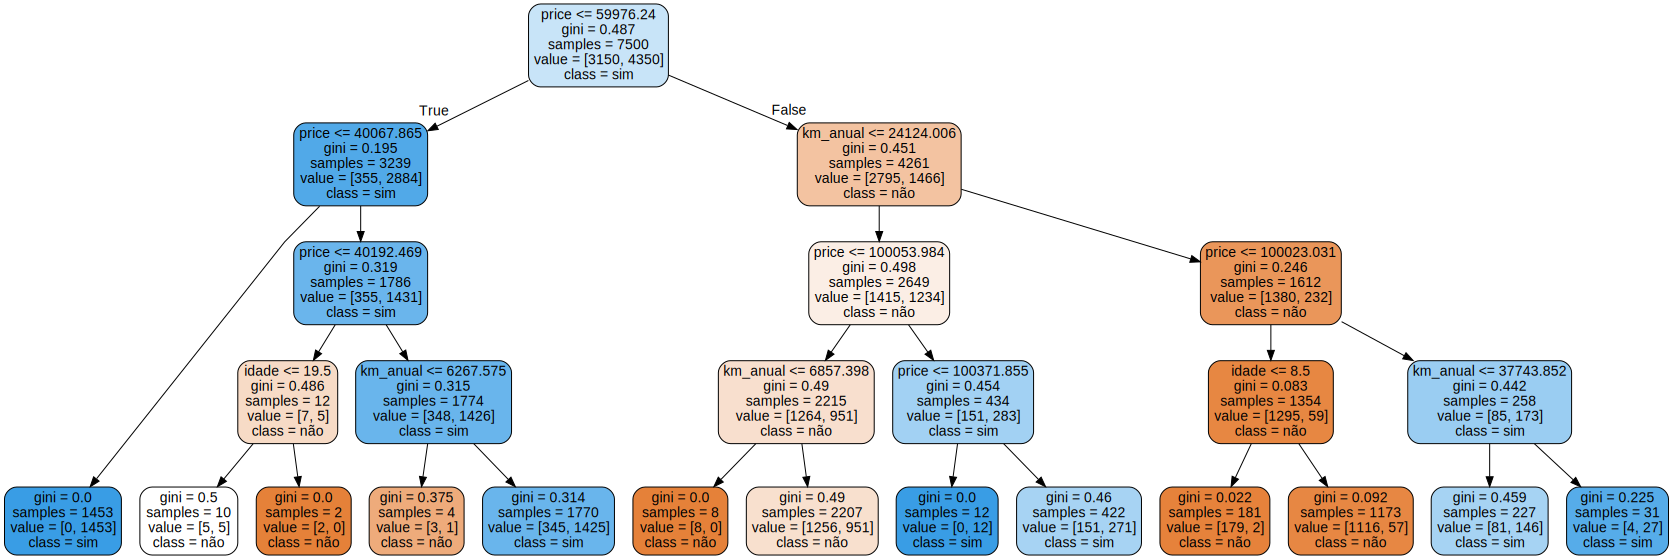

In [12]:
tree_data = export_graphviz(model, feature_names=x.columns, rounded=True, filled=True, class_names=['não', 'sim'], leaves_parallel=True)
graphviz.Source(tree_data)